In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


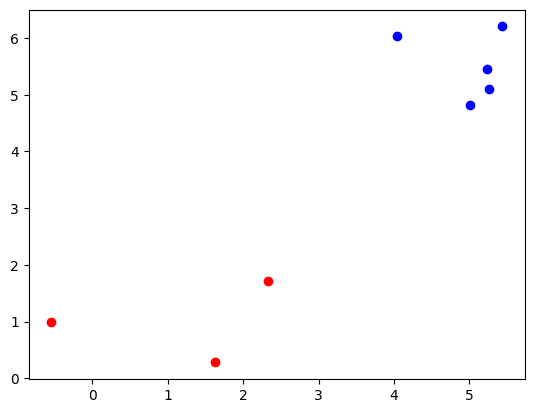

In [106]:
np.random.seed(10)
ca = np.random.randn(3, 2) + np.array([1, 1])
cb = np.random.randn(5, 2) + np.array([5, 5])

X = np.vstack((ca, cb))
y = np.array([1]*3 + [-1]*5)

plt.scatter(ca[:, 0], ca[:, 1], color = 'red')
plt.scatter(cb[:, 0], cb[:, 1], color = 'blue')

In [114]:
b = 0
C = 100
alphas = np.zeros(X.shape[0])

In [115]:
def calc_w(alphas, X, y):
  return np.sum((alphas * y).reshape(-1, 1) * X, axis = 0)

In [41]:
def calc_E(alphas, X, y, i):
  w = calc_w(alphas, X, y)
  f_i = np.dot(w, X[i]) + b
  return f_i - y[i]

In [94]:
def smo(alphas, X, y, C):
  max_iter = 5000
  cur_iter = 0
  while (cur_iter < max_iter):
    alpha_i = first_alpha(alphas, X, y)
    if (alpha_i == -1):
      break
    alpha_j = second_alpha(alphas, alpha_i, X, y)
    if (alpha_j == -1):
      break
    optimize_alphas(alphas, alpha_i, alpha_j, X, y, C)
    cur_iter = cur_iter + 1




In [53]:
def optimize_alphas(alphas, i, j, X, y, C):
  L = 0
  H = C
  if (y[i] != y[j]):
    L = max(0, alphas[j] - alphas[i])
    H = min(C, C + alphas[j] - alphas[i])
  else:
    L = max(0, alphas[j] + alphas[i])
    H = max(C, C + alphas[j] + alphas[i])
  E_i = calc_E(alphas, X, y, i)
  E_j = calc_E(alphas, X, y, j)
  diff = np.abs(E_i - E_j)
  eta = 2 * np.dot(X[i], X[j]) - np.dot(X[i], X[i]) - np.dot(X[j], X[j])
  old_alpha_j = alphas[j]
  alphas[j] = alphas[j] - ((y[j] * diff) / eta)
  if (alphas[j] > H):
    alphas[j] = H
  elif (alphas[j] < L):
    alphas[j] = L
  old_alpha_i = alphas[i]
  alphas[i] = alphas[i] + y[i] * y[j] * (old_alpha_j - alphas[j])
  global b
  b1 = b - E_i - y[i] * (alphas[i] - old_alpha_i) * np.dot(X[i], X[i]) - y[j] * (alphas[j] - old_alpha_j) * np.dot(X[i], X[j])
  b2 = b - E_j - y[i] * ( alphas[i] - old_alpha_i) * np.dot(X[i], X[j]) - y[j] * (alphas[j] - old_alpha_j) * np.dot(X[j], X[j])
  if (alphas[i] > 0 or alphas[i] < C):
    b = b1
  elif (alphas[j] > 0 or alphas[j] < C):
    b = b2
  else:
    b = (b1 + b2) / 2


In [112]:
def first_alpha(alphas, X, y):
  max = -1
  alpha_i = -1
  w = calc_w(alphas, X, y)

  for i in range(0, len(alphas)):
    f_i = np.dot(w, X[i]) + b
    if (y[i] * f_i < 1 and alphas[i] < C) or (y[i] * f_i > 1 and alphas[i] > 0):
       E_i = f_i - y[i]
       if (E_i > max):
        max = E_i
        alpha_i = i
  return alpha_i

In [113]:
def second_alpha(alphas, i, X, y):
  max = -1
  alpha_j = -1
  w = calc_w(alphas, X, y)
  f_i = np.dot(w, X[i]) + b
  E_i = f_i - y[i]
  for j in range(0, len(alphas)):
    if (j == i):
       continue
    f_j = np.dot(w, X[j]) + b
    if (y[j] * f_j < 1 and alphas[j] < C) or (y[j] * f_j > 1 and alphas[j] > 0):
      E_j = f_j - y[j]
      if (np.abs(E_i - E_j) > max):
        max = np.abs(E_i - E_j)
        alpha_j = j
  return alpha_j

In [116]:
smo(alphas, X, y, C)
w = calc_w(alphas, X, y)


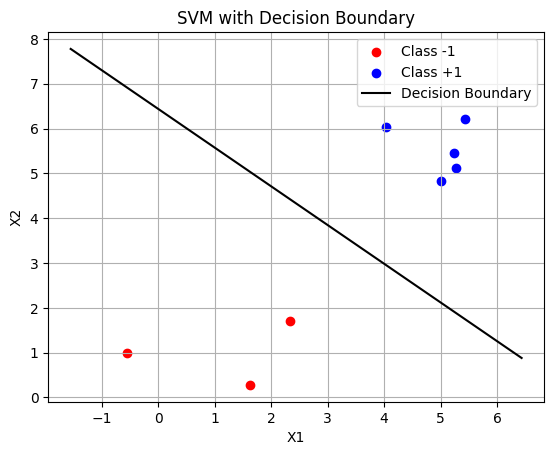

In [118]:
plt.scatter(ca[:, 0], ca[:, 1], color='red', label='Class -1')
plt.scatter(cb[:, 0], cb[:, 1], color='blue', label='Class +1')
x0 = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x1 = -(w[0] * x0 + b) / w[1]
plt.plot(x0, x1, 'k-', label='Decision Boundary')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM with Decision Boundary")
plt.grid(True)
plt.legend()
plt.show()
